In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


from sqlalchemy import create_engine, inspect, func

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# access/connect to the data(wire for connection)
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
print(session.query(Measurement))

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [11]:
print(session.query(Station))

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation = engine.execute('SELECT * FROM measurement WHERE date > "2016-08-23" AND date < "2017-08-23"').fetchall()
station = engine.execute("SELECT * FROM station").fetchall()

In [13]:
# Calculate the date 1 year ago from the last data point in the database
engine.execute("SELECT * FROM measurement ORDER BY date DESC LIMIT 10").fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0)]

In [14]:
# Perform a query to retrieve the data and precipitation scores

precipitation = pd.DataFrame(precipitation, columns= ['id', 'station', 'date', 'prcp', 'tobs'])
stations = pd.DataFrame(station, columns = ["id", "station", "station_name", "lat", "long", "elevation"])


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_merged_df = pd.merge(precipitation, stations, how='left', on='station')
precipitation_merged_df.head()

,id_x,station,date,prcp,tobs,id_y,station_name,lat,long,elevation
0,2365,USC00519397,2016-08-24,0.08,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2366,USC00519397,2016-08-25,0.08,80.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,2367,USC00519397,2016-08-26,0.00,79.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,2368,USC00519397,2016-08-27,0.00,77.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,2369,USC00519397,2016-08-28,0.01,78.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [16]:
# Sort the dataframe by date
precipitation_merged_df = precipitation_merged_df.sort_values("date")
precipitation_merged_df.head()


,id_x,station,date,prcp,tobs,id_y,station_name,lat,long,elevation
0,2365,USC00519397,2016-08-24,0.08,79.0,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1004,8826,USC00517948,2016-08-24,NaN,78.0,4,"PEARL CITY, HI US",21.39340,-157.97510,11.9
1521,14609,USC00519281,2016-08-24,2.15,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
701,7332,USC00514830,2016-08-24,2.28,80.0,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
359,5092,USC00513117,2016-08-24,2.15,76.0,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6


<Figure size 432x288 with 0 Axes>

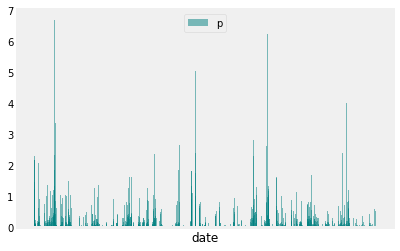

<Figure size 432x288 with 0 Axes>

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(precipitation_merged_df["date"],precipitation_merged_df["prcp"] , color="teal", alpha=0.5, align="center")


plt.xlabel("date")
plt.legend("precipitation", loc="upper center")
plt.xticks([])
plt.grid()
plt.figure()




![precipitation](Images/precipitation.png)

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data

list_precipitation = pd.DataFrame(precipitation_merged_df["prcp"].describe())
list_precipitation

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [30]:
# Design a query to show how many stations are available in this dataset?
precipitation_merged_df["station"].nunique()

7

In [53]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = pd.DataFrame(precipitation_merged_df.groupby(["station"])["id_x"].count())
active_stations.sort_values('id_x')


,id_x
station,
USC00517948,182
USC00514830,303
USC00519523,335
USC00513117,342
USC00516128,347
USC00519281,351
USC00519397,359


In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = precipitation_merged_df.loc[precipitation_merged_df['station'] == "USC00519397"]

lowest_temp = precipitation_merged_df["tobs"].min()
highest_temp = precipitation_merged_df["tobs"].max()
avg_temp = precipitation_merged_df["tobs"].mean()

temp_df = pd.DataFrame({"lowest temp": lowest_temp, "highest temp": highest_temp, "average temp": avg_temp}, index=["USC00519397"],)

temp_df

,lowest temp,highest temp,average temp
USC00519397,58.0,87.0,74.568725


In [62]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
precipitation_merged_df.groupby(["station"])["tobs"].count()
USC00519397
precipitation_merged_df

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', 
     align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, 
     normed=None, *, data=None, **kwargs)

station
USC00513117    342
USC00514830    303
USC00516128    347
USC00517948    182
USC00519281    351
USC00519397    359
USC00519523    335
Name: tobs, dtype: int64

![precipitation](Images/station-histogram.png)

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
